## PLS Path modeling to predict species richness using LiDAR data
### This is a tutorial about PLS Path Modeling applied to Geocience. The sample data is part of the analysis of [**THIS**](http://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=6990570) paper.  
### See more information on PLS-PM [here](http://gastonsanchez.com/PLS_Path_Modeling_with_R.pdf)
#### author: Javier Lopatin 
#### mail: javier.lopatin@kit.edu & javierlopatin@gmail.com
#### last changes: 28/0/2016


In [50]:
library(plspm)

## set working directory
setwd("C:/Users/Lopatin/Dropbox/Publicaciones/OBIA-PLSPM")
 
## Load data
datapls <- read.table("datapls.txt", header=T, sep="", dec=".") 

In [29]:
## Set the inner model
# rows of the inner model matrix
Hieght.Canopies  = c(0, 0, 0, 0, 0, 0, 0)
Midle1.Canopies  = c(0, 0, 0, 0, 0, 0, 0)
Midle2.Canopies  = c(0, 0, 0, 0, 0, 0, 0)
Low.Canopies     = c(0, 0, 0, 0, 0, 0, 0)
OBIA             = c(1, 1, 1, 1, 0, 0, 0)
Topography       = c(0, 0, 0, 0, 0, 0, 0)
Richness         = c(0, 0, 0, 0, 1, 1, 0)

In [30]:
# matrix created by row binding. Creación de las variables latentes(Agrupaciones ficticias de las variables respuesta y predictoras)
Q_inner = rbind(Hieght.Canopies, Midle1.Canopies,Midle2.Canopies, Low.Canopies, OBIA, Topography, Richness)

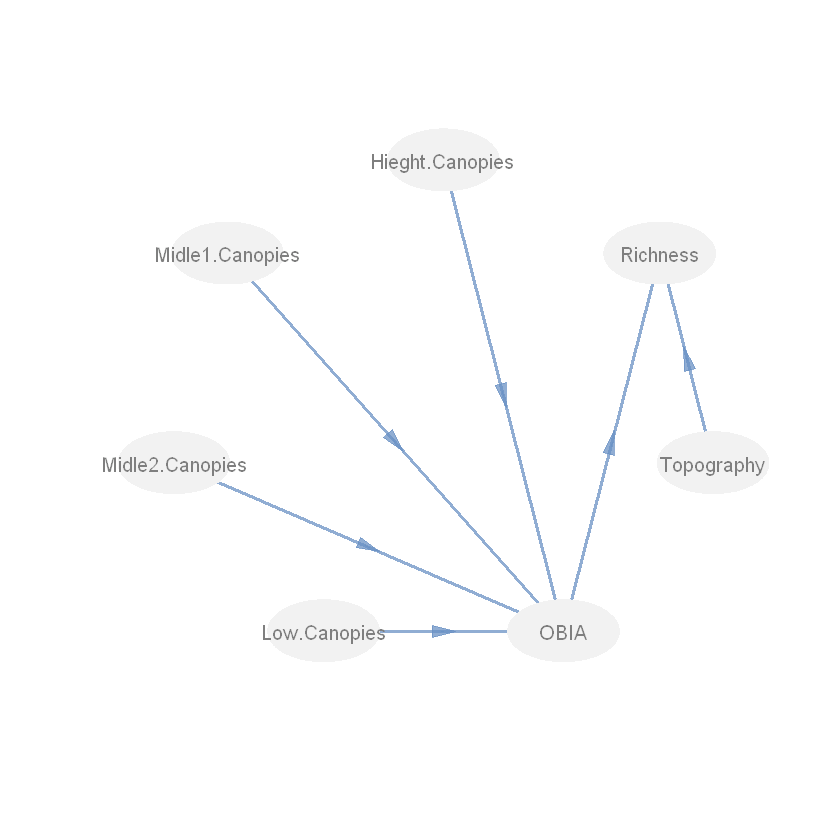

In [31]:
# add column names (optional)
colnames(Q_inner) = rownames(Q_inner)

# plot the inner matrix
innerplot(Q_inner)

In [20]:
### Set the outer model
# set the "Modes" of the relations: character vector indicating the type of measurement for each block.
Q_modes = rep("A",7)

In [120]:
# define list of indicators: what variables are associated with what latent variable: 
# in the same orther than Q_inner: Hieght.Canopies, Midle1.Canopies, Midle2.Canopies, Low.Canopies, OBIA, Topography, Richness
Q_outer = list(80:83, 123:126, 166:168, 209:212, 25:40, 252:254, c(6,7,8)) 

In [ ]:
### Run first try!
Q_pls = plspm(datapls, Q_inner, Q_outer, Q_modes, maxiter= 1000, boot.val = F, br = 1000, scheme = "factor", scaled = T)
# keep the bootstrap validation "boot.val"=F in this first step to make it faster

In [94]:
# Check quality of  the outer model: in the differents indices values should be over 0.7
# this is a measure of how well construct are the blocks of predictors.
Q_pls$unidim

,Mode,MVs,C.alpha,DG.rho,eig.1st,eig.2nd
Hieght.Canopies,A,4,0.846691847864926,0.898541284976128,2.76660593039423,0.848970661259768
Midle1.Canopies,A,3,0.832649280723446,0.902890955686392,2.27622104645669,0.703391587881361
Midle2.Canopies,A,3,0,0.282623863915595,1.7994571554243,1.16646325558366
Low.Canopies,A,4,0.583217363882368,0.549549877784367,1.9039716970801,1.80619452395328
OBIA,A,16,0,0.134346140387168,6.78169811420588,3.03926457205021
Topography,A,3,0,0.135732552235257,1.31878839969304,0.917497083954768
Richness,A,3,0.823262974611027,0.894912864943492,2.21931450180523,0.495174584199028


In [95]:
# check outer model. Loadings must be greater than 0.7, and communalites grater than 0.5:
Q_pls$outer

,name,block,weight,loading,communality,redundancy
1,Copas_A,Hieght.Canopies,0.35856854885461,0.887519839594922,0.787691465674596,0
2,Cobertura_,Hieght.Canopies,0.345898960229866,0.94614604741216,0.895192343033654,0
3,Promedio_A,Hieght.Canopies,0.270903422885627,0.672115038550411,0.451738625045621,0
4,STD_A,Hieght.Canopies,0.218305257714878,0.789784461903717,0.623759496264543,0
5,Copas_B,Midle1.Canopies,0.404997431054494,0.88395131534034,0.781369927891918,0
6,Cobertura_B,Midle1.Canopies,0.438210882193238,0.993479294561978,0.987001108723365,0
7,Promedio_B,Midle1.Canopies,0.290485615251922,0.711389959258348,0.506075674133594,0
8,Copas_C,Midle2.Canopies,0.270958947201145,0.47408348163835,0.22475514756234,0
9,Cobertura_C,Midle2.Canopies,0.801763112396802,0.994483529540894,0.988997490528114,0
10,Promedio_C,Midle2.Canopies,0.299211312373236,0.247994063022574,0.0615010552944445,0


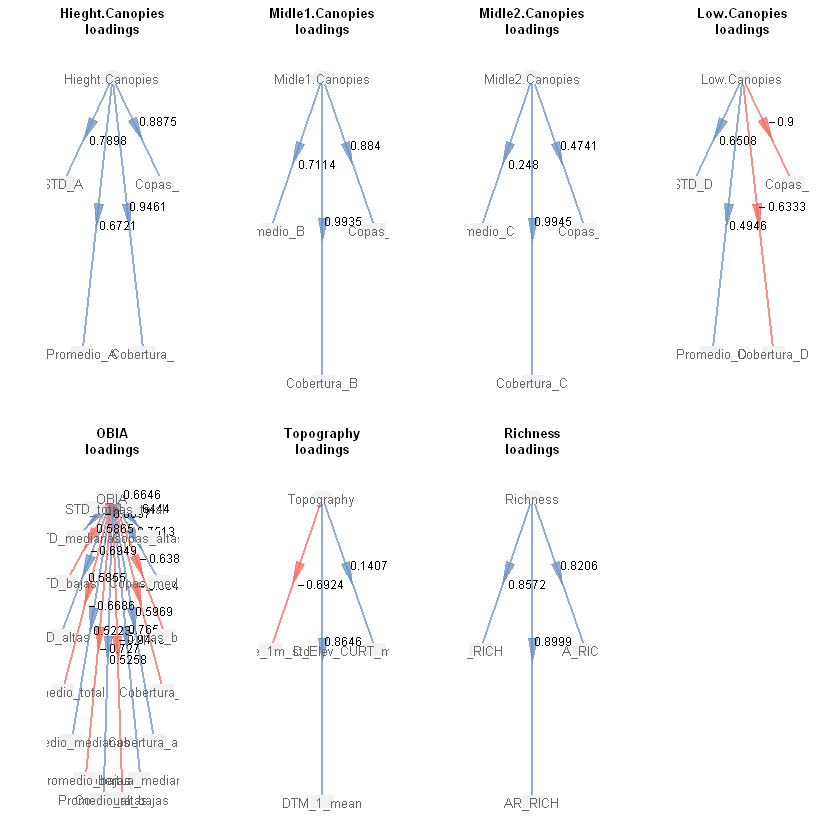

In [96]:
# plotting the loadings 
plot(Q_pls, what = "loadings")

In [97]:
# Another measure of block construction is the "crossloadings". This gives you the correlation of the variables with all Latent Variables.
# The idea is to find if there are any "traitor" indicators. That means that the R should be higher within his own block or LV
Q_pls$crossloading

,name,block,Hieght.Canopies,Midle1.Canopies,Midle2.Canopies,Low.Canopies,OBIA,Topography,Richness
1,Copas_A,Hieght.Canopies,0.887519839594922,0.408320449896677,-0.0409628240716801,-0.001321448147798,0.494507103206552,0.360346091919818,-0.347890513463862
2,Cobertura_,Hieght.Canopies,0.94614604741216,0.423037715082624,-0.101613998438346,-0.0378794248622538,0.477033100750562,0.342332956501919,-0.330279634319887
3,Promedio_A,Hieght.Canopies,0.672115038550411,0.393832337911125,-0.138767293942483,0.00313224478289262,0.373624675506314,0.253705955042277,-0.298215764021587
4,STD_A,Hieght.Canopies,0.789784461903717,0.412115437256486,-0.0491633246154661,-0.187929206135685,0.301076681899943,0.301551214586249,-0.329918023607281
5,Copas_B,Midle1.Canopies,0.44231515720977,0.88395131534034,0.227577955613479,0.34410188923242,0.807301180930434,0.566422768045243,-0.621058552391112
6,Cobertura_B,Midle1.Canopies,0.496245643744107,0.993479294561978,0.13078255915272,0.303913338979056,0.873503647898155,0.597532612315923,-0.669180896970888
7,Promedio_B,Midle1.Canopies,0.319464797929433,0.711389959258348,-0.0400846635645223,0.136653888765394,0.579034610696536,0.231580269142035,-0.31461727298685
8,Copas_C,Midle2.Canopies,-0.0391035837051883,0.0189503699086996,0.47408348163835,0.301497459654833,0.0694464801945686,0.107129640558924,-0.0896605248719219
9,Cobertura_C,Midle2.Canopies,-0.110065744503097,0.125595634919676,0.994483529540894,0.410252405442274,0.205493631772666,0.210909253730165,-0.191186016193234
10,Promedio_C,Midle2.Canopies,0.00227536785069336,0.106954814516118,0.247994063022574,-0.0624333138782381,0.0766904792396831,0.0790222323971254,-0.0697021139252762


In [126]:
# now you can eliminate all variables with loading below 0.7
# Also, internally is not possible to have negative loading. The proposed solution is to invert the scale of the ill-fated manifest variables:
datapls$NCobertura_bajas = -1 * datapls$Cobertura_bajas # new variable N° 255
datapls$Nslope_1m_std    = -1 * datapls$slope_1m_std    # new variable N° 256

In [127]:
### Run second try!
# set again the list of indicators with the selected and inverted variables

# (80:83, 123:126, 166:168, 209:212, 25:40, 251:253, c(6,7,8))

Q_outer = list (c(80,81,83), c(123,124), c(167), c(209,210), c(27,31,255), c(252, 256), c(6,7,8))

In [128]:
# run PLSPM
Q_pls = plspm(datapls, Q_inner, Q_outer, Q_modes, maxiter= 1000, boot.val = T, br = 1000, scheme = "factor", scaled = T)
summary(Q_pls)
# check again for the indicators of model quality. This time use bootstrap validation. With summary yo have all information

PARTIAL LEAST SQUARES PATH MODELING (PLS-PM) 

---------------------------------------------------------- 
MODEL SPECIFICATION 
1   Number of Cases      78 
2   Latent Variables     7 
3   Manifest Variables   16 
4   Scale of Data        Standardized Data 
5   Non-Metric PLS       FALSE 
6   Weighting Scheme     factorial 
7   Tolerance Crit       1e-06 
8   Max Num Iters        1000 
9   Convergence Iters    4 
10  Bootstrapping        TRUE 
11  Bootstrap samples    1000 

---------------------------------------------------------- 
BLOCKS DEFINITION 
              Block         Type   Size   Mode
1   Hieght.Canopies    Exogenous      3      A
2   Midle1.Canopies    Exogenous      2      A
3   Midle2.Canopies    Exogenous      1      A
4      Low.Canopies    Exogenous      2      A
5              OBIA   Endogenous      3      A
6        Topography    Exogenous      2      A
7          Richness   Endogenous      3      A

---------------------------------------------------------- 
BLOC

In [ ]:
# repeat the steps again until you are happy with your model

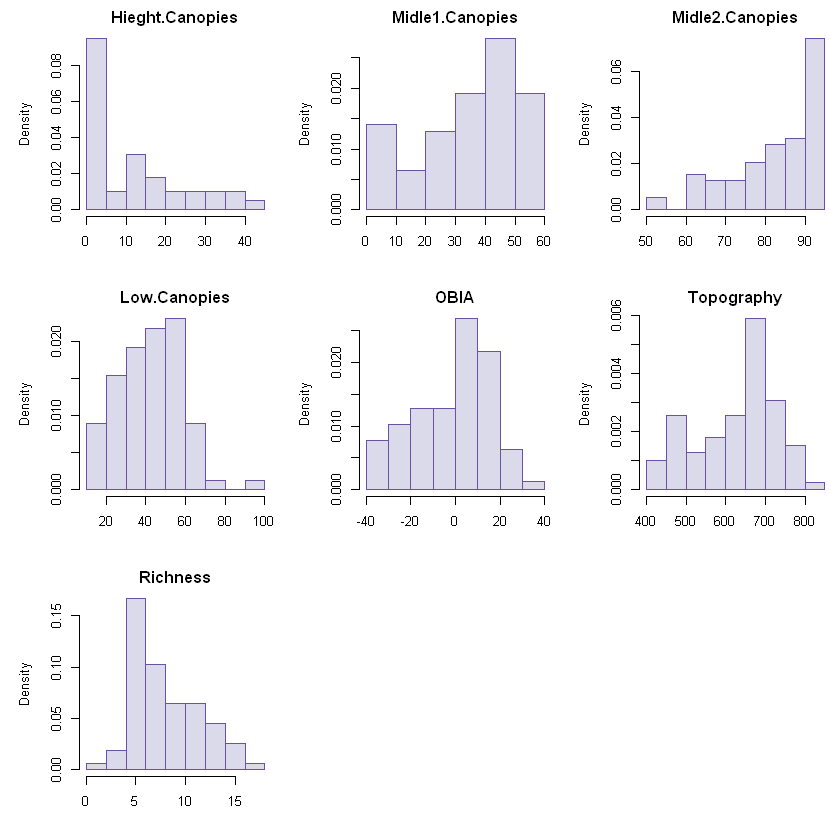

In [129]:
# rescaling scores. Para que las VL tengan la misma escala que los indicadores
Scores = rescale(Q_pls)

op = par(mfrow = c(3, 3), mar = c(4, 5, 2, 0.5))
# for each score
for (j in 1:7) {
  # histogram (with probability density)
  hist(Scores[, j], freq = FALSE, xlab = "", border = "#6A51A3",
       col = "#DADAEB", main = colnames(Scores)[j])
  # add axes
  axis(side = 1, col = "black", col.axis = "black")
  axis(side = 2, col = "black", col.axis = "black")
}
par(op)

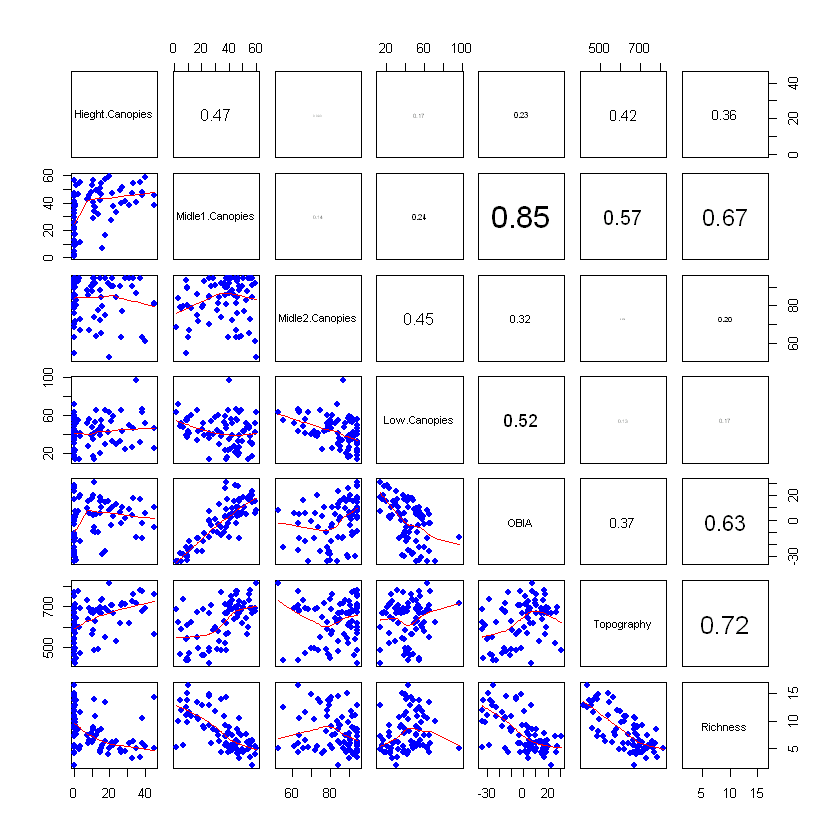

In [130]:
# Pairs plot
panel.cor <- function(x, y, digits=2, prefix="", cex.cor, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))
  r <- abs(cor(x, y))
  txt <- format(c(r, 0.123456789), digits=digits)[1]
  txt <- paste(prefix, txt, sep="")
  if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
  text(0.5, 0.5, txt, cex = cex.cor * r)
}
pairs(Scores, pch = 16, col = "blue", panel=panel.smooth, upper.panel=panel.cor)

In [ ]:
### Predict Richness!
# simulate the PLS-PM interactions. All variables are linear relationships. 
# See: Lopatin, J., Galleguillos, M., Fassnacht, F. E., Ceballos, A., & Hernández, J. (2015). Using a Multistructural Object-Based LiDAR Approach to Estimate Vascular Plant Richness in Mediterranean Forests With Complex Structure. IEEE Geoscience and Remote Sensing Letters, 12(5), 1008–1012.
# Create the outer model

In [131]:
Q_pls$outer


,name,block,weight,loading,communality,redundancy
1,Copas_A,Hieght.Canopies,0.37634990403535,0.917820976444404,0.842395344801359,0
2,Cobertura_,Hieght.Canopies,0.35103953492534,0.955351016824881,0.912695565348334,0
3,STD_A,Hieght.Canopies,0.392932520618612,0.812384239549093,0.659968152667759,0
4,Copas_B,Midle1.Canopies,0.503713171691664,0.970234273938974,0.941354546325888,0
5,Cobertura_B,Midle1.Canopies,0.525630471449437,0.972698966976506,0.946143280357161,0
6,Cobertura_C,Midle2.Canopies,1,1,1,0
7,Copas_D,Low.Canopies,0.60185531855791,0.978149366725888,0.956776183626256,0
8,Cobertura_D,Low.Canopies,0.429908161193049,0.956705730243817,0.915285854281355,0
9,Copas_medianas,OBIA,0.330507433325953,0.932925548489642,0.8703500790247,0.712839213617221
10,Cobertua_medianas,OBIA,0.337925386946606,0.9675955494434,0.936241147302676,0.766805701847227


In [147]:
O.Hieght.Canopies<-((datapls$Copas_A*Q_pls$outer$weight[1])+(datapls$Cobertura_*Q_pls$outer$weight[2])+(datapls$STD_A*Q_pls$outer$weight[3]))
O.Midle1.Canopies<-((datapls$Copas_B*Q_pls$outer$weight[4])+(datapls$Cobertura_B*Q_pls$outer$weight[5]))
O.Midle2.Canopies<-(datapls$Cobertura_C*Q_pls$outer$weight[6])
O.Low.Canopies<-((datapls$Copas_D*Q_pls$outer$weight[7])+(datapls$Cobertura_D*Q_pls$outer$weight[8]))
OBIA<-((datapls$Copas_medianas*Q_pls$outer$weight[9])+(datapls$Cobertua_medianas*Q_pls$outer$weight[10])+(datapls$NCobertura_bajas*Q_pls$outer$weight[11]))
Topography<-((datapls$DTM_1_mean*Q_pls$outer$weight[12])+(datapls$Nslope_1m_std*Q_pls$outer$weight[13]))
Rich<-((datapls$A_RICH*Q_pls$outer$weight[14])+(datapls$AR_RICH*Q_pls$outer$weight[15])+(datapls$H_RICH*Q_pls$outer$weight[16]))
#n.Rich<-Rich*1.73
summary(Rich)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.217   6.128   8.436   9.226  12.130  19.120 

In [148]:
# Normalize the data
norm.HC <- (O.Hieght.Canopies-mean(O.Hieght.Canopies))/sd(O.Hieght.Canopies)
norm.MC1 <-(O.Midle1.Canopies-mean(O.Midle1.Canopies))/sd(O.Midle1.Canopies)
norm.MC2 <-(O.Midle2.Canopies-mean(O.Midle2.Canopies))/sd(O.Midle2.Canopies)
norm.LC<-(O.Low.Canopies-mean(O.Low.Canopies))/sd(O.Low.Canopies)
norm.Topo<-(Topography-mean(Topography))/sd(Topography)
norm.OBIA<-(OBIA-mean(OBIA))/sd(OBIA)

In [150]:
# Create the inner model
OBIA2<-(norm.HC*Q_pls$path_coefs[5]+norm.MC1*Q_pls$path_coefs[12]+norm.MC2*Q_pls$path_coefs[19]+norm.LC*Q_pls$path_coefs[26])
# predict Richness
Observed <- Rich
Predicted<- ((OBIA2*Q_pls$path_coefs[35]+norm.Topo*Q_pls$path_coefs[42])*sd(Observed)) + mean(Observed)

cor(Predicted, Observed)

[1] 0.7891042

In [151]:
summary(Observed)
summary(Predicted)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.217   6.128   8.436   9.226  12.130  19.120 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.627   6.576   8.279   9.226  11.770  16.280 

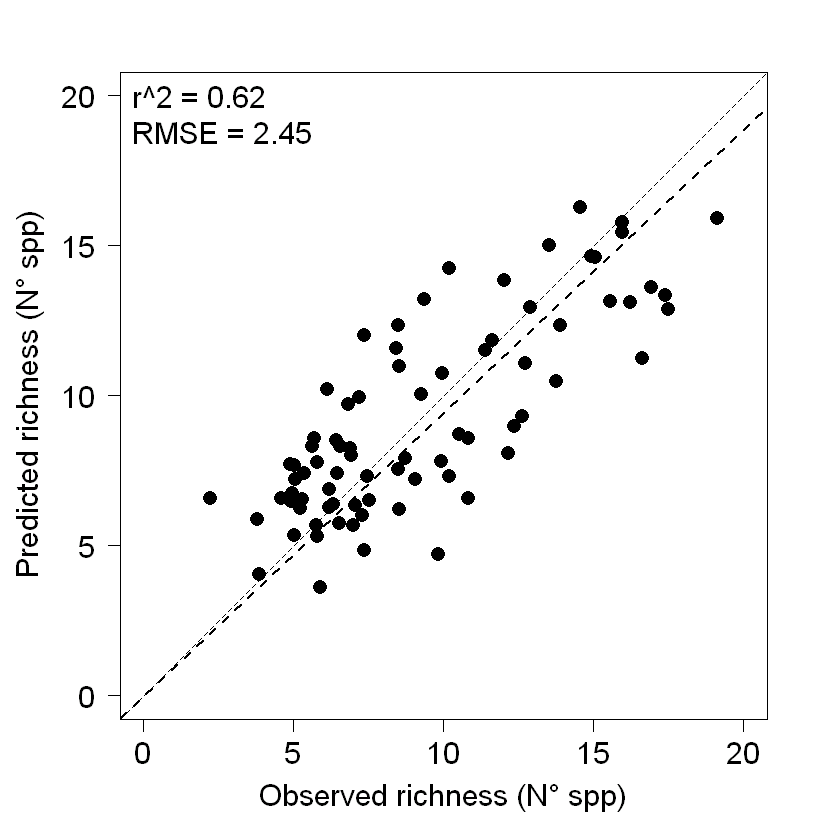

In [158]:
par(mar=c(5, 5, 3, 3))
Mytitle = ""
MyXlab <- expression(paste("Observed richness (N° spp)"))
MyYlab <- expression(paste("Predicted richness (N° spp)"))
plot(Observed,Predicted,xlim=c(0,20), ylim=c(0,20),
     xlab = MyXlab, ylab = MyYlab, pch=16, pty="s", cex=1.5, cex.lab=1.5, cex.axis=1.5, main = Mytitle, las= 1)
abline(0, 1, lty=2)

R2 <- (cor(Predicted, Observed, method="pearson"))^2
RMSE <- sqrt(mean((Observed-Predicted)^2))

lm1 = lm(Predicted ~ Observed-1)
abline(lm1, lty=2, lwd=2)

txt1 = paste("r^2 =", round(R2,2))
txt2 = paste("RMSE =",round(RMSE,2), "")
txt = paste(txt1, txt2, sep="\n") 
pusr = par()$usr
text(x=pusr[1]+0.02*(pusr[2]-pusr[1]), y=pusr[4]-0.02*(pusr[4]-pusr[3]), txt, adj=c(0,1), cex=1.5)



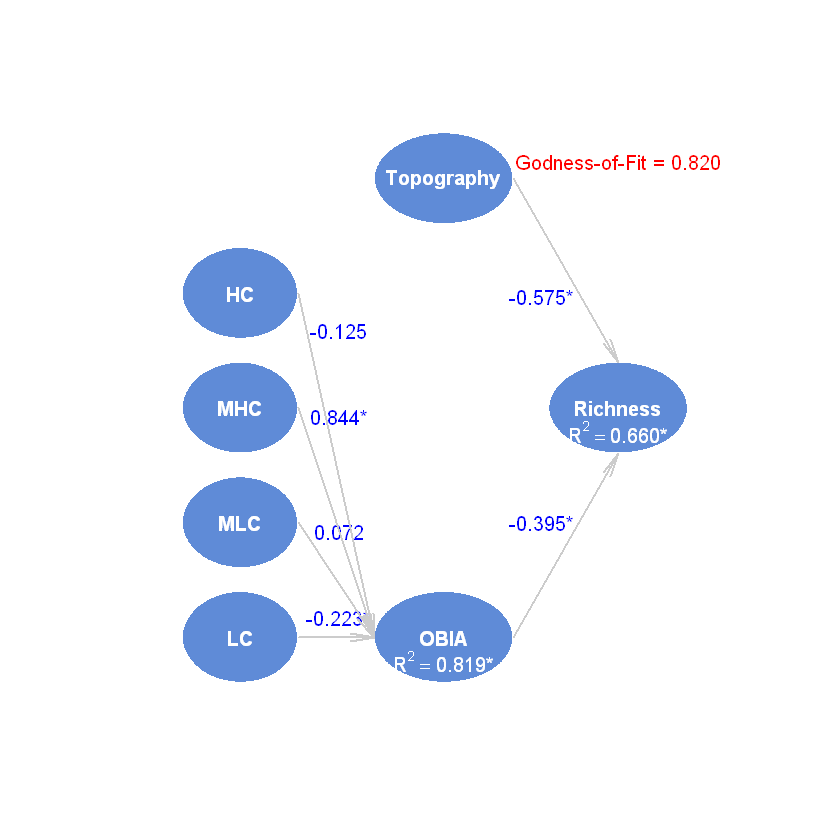

In [169]:
library(pathdiagram)

## open plot window
wall(xlim = c(-0.1, 1), ylim = c(0, 1))

LV1 = latent("Topography", x=0.45, y=0.90, rx=0.12, ry=0.08, cex=1)
text(0.62,0.66,"-0.575*", pos=3, cex=1, col="blue")

LV3 = latent("OBIA", x=0.45, y=0.10, rx=0.12, ry=0.08,  cex= 1)
text(0.62,0.3,"-0.395*", cex=1, col="blue")

LV3.1= latent("HC", x=0.1, y=0.7, rx=0.1, ry=0.08, cex=1) 
LV3.2= latent("MHC", x=0.1, y=0.5, rx=0.1, ry=0.08, cex=1) 
LV3.3= latent("MLC", x=0.1, y=0.3, rx=0.1, ry=0.08, cex=1) 
LV3.4= latent("LC",  x=0.1, y=0.1, rx=0.1, ry=0.08, cex=1) 
text(0.27,0.6,"-0.125", cex=1, pos=3, col="blue")
text(0.27,0.45,"0.844*", cex=1, pos=3, col="blue")
text(0.27,0.25,"0.072", cex=1, pos=3, col="blue")
text(0.27,0.1,"-0.223*", cex=1, pos=3, col="blue")

LV4 = latent("Richness", x=0.75, y=0.5, rx=0.12, ry=0.08, cex=1)          

draw(LV1)
draw(LV3)
draw(LV3.1)
draw(LV3.2)
draw(LV3.3)
draw(LV3.4)
draw(LV4)

## Arrows of the inner model
arrow(from =LV1 , to = LV4, start = "east", end = "north", lwd = 2, col = "gray80", length=0.2)
arrow(from =LV3 , to = LV4, start = "east", end = "south", lwd = 2, col = "gray80", length=0.2)

arrow(from =LV3.1 , to = LV3, start = "east", end = "west", lwd = 2, col = "gray80", length=0.2)
arrow(from =LV3.2 , to = LV3, start = "east", end = "west", lwd = 2, col = "gray80", length=0.2)
arrow(from =LV3.3 , to = LV3, start = "east", end = "west", lwd = 2, col = "gray80", length=0.2)
arrow(from =LV3.4 , to = LV3, start = "east", end = "west", lwd = 2, col = "gray80", length=0.2)

## TEXT R2 
text(0.75,0.46,substitute(R^2 == "0.660*"), col="white", cex=1)
text(0.75,0.93, "Godness-of-Fit = 0.820", cex=1, col="red")
text(0.45,0.06,substitute(R^2 == "0.819*"), col="white", cex=1)